<a href="https://colab.research.google.com/github/nafrielramadhan/regression/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Fakultas Ilmu Komputer, Universitas Indonesia

Questions answered by: Muhammad Nafriel Ramadhan

##**Topic: *Regression***
</center>



## Intro to Linear Models for Regression

### Linear Regression

Linear regression adalah salah satu metode supervised learning yang bekerja dengan mencari nilai parameter yang paling cocok untuk suatu persamaan linear, yaitu parameter yang menghasilkan error paling minimal. Linear regression menggunakan asumsi bahwa input mempunyai hubungan yang linear dengan target, sehingga model ini akan membuat persamaan garis lurus sebagai fungsi hipotesis.<br>

Contoh persamaan linear

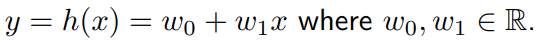

Persamaan di atas adalah fungsi yang memetakan $x$ ke $y$ (dimana $y = h(x)$), dengan:
- $w_0$ adalah _intercept_, titik potong, atau bias
- $w_1$ adalah koefisien
- $x$ adalah nilai independen (input variable)
- $y$ adalah nilai dependen (target variable)

Perhatikan bahwa persamaan tersebut hanya menerima 1 fitur ($x$).

Apabila jumlah fitur pada dataset >1, persamaan bisa digeneralisasikan menjadi sebagai berikut.

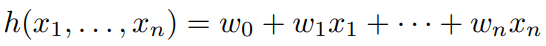

atau

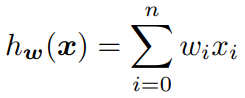

Nilai-nilai parameter seperti $w_0, w_1, w_2, w_n$, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimalkan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression, yang biasa disebut _sum-of-square error function_.

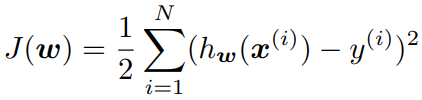

Proses peminimalan nilai loss akan menggunakan algoritma Gradient Descent yang bisa Anda pelajari lebih lanjut dari slide kuliah. :)

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Linear Regression dengan Scikit-learn**

Scikit-learn menyediakan modul LinearRegression yang siap dipakai untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 1 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = -3+2x`. Nilai -3 dan 2, secara berurutan dapat dianggap sebagai nilai $w_0$ dan $w_1$.

In [ ]:
import numpy as np

# Membuat data buatan

X = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
Y = -3 + 2 * X

# menambahkan beberapa noises pada data
noise = np.array([0.2, -0.1, 0.3, -0.2, 0.1, -0.3, 0.1, -0.2, 0.2, -0.1])
X_train  = X.reshape(-1, 1)
y_train = Y + noise

print('X: ', X_train)
print('y: ', y_train)

X:  [[2]
 [3]
 [2]
 [4]
 [5]
 [2]
 [1]
 [5]
 [5]
 [1]]
y:  [ 1.2  2.9  1.3  4.8  7.1  0.7 -0.9  6.8  7.2 -1.1]


In [ ]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [ ]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model
print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [1.99166667]
Intersep persamaan linear: 
 -2.975000000000002


Berdasarkan persamaan linear tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

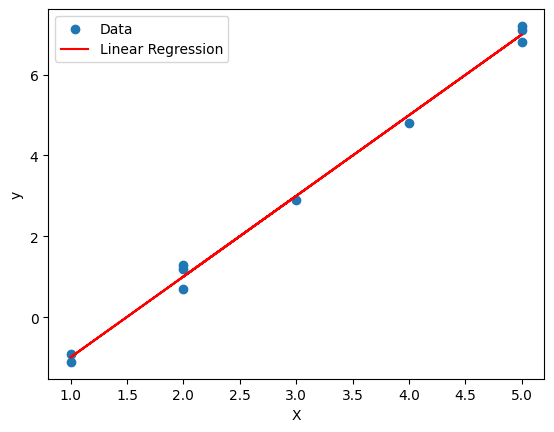

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = linear.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [ ]:
# Melakukan percobaan prediksi model linear regression menggunakan data testing buatan

X_test = np.array([[2], [4], [7]])
y_test = np.array([1, 5, 11])

y_predict = linear.predict(X_test)

print(y_predict)

[ 1.00833333  4.99166667 10.96666667]


Hasil prediksi (y_predict) memiliki nilai yang hampir mirip dengan nilai y yang sebenarnya (y_test). Hal ini menandakan model memiliki performa yang baik.

Performa model regresi dapat diukur dengan beberapa metrik evaluasi, contohnya adalah R-squared. Lihat kode di bawah ini.

In [ ]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

R-squared: 0.9999753289473684


Dari hasil di atas, dapat diketahui bahwa 99% variasi pada y dapat dijelaskan oleh x pada model regresi. Atau dengan kata lain, perbedaan antara prediksi dan aktual memiliki nilai yang kecil. Untuk implementasi Linear Regression lebih lanjutnya menggunakan **sklearn** dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance karena model yang dihasilkan bersifat linear. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension).

Untuk mengatasi hal tersebut, salah satu teknik yang bisa digunakan adalah regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan pengaruh bobot pada model dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

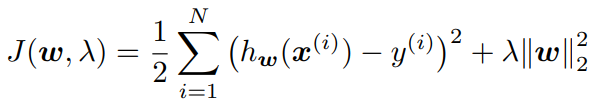

- Lasso Regression

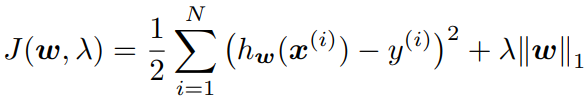

Fungsi loss pada model regularisasi ini hampir sama dengan linear regression biasa, hanya saja ditambahkan term regularisasi di akhir.

Term tambahan pada fungsi loss tersebut berperan seperti bobot penalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

Parameter λ akan menentukan seberapa besar dampak regularisasi pada model yang terbentuk.
- Semakin besar nilai λ menunjukan pengaruh regularization term yang besar pada bobot dan berdampak pada nilai bobot mengecil sehingga dapat mencegah overfitting
- Semakin kecil nilai λ menunjukan pengaruh regularisasi yang kecil

Ketika nilai λ=0, algoritma yang dilatih sama dengan linear regression biasa tanpa adanya regularisasi.


**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset buatan sebelumnya.

In [ ]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2) # Mengatur hyperparameter alpha=2
ridge.fit(X_train, y_train)

Ridge(alpha=2)

Setelah pelatihan selesai, **ridge** memiliki parameter hasil generalisasi ridge regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [ ]:
# Melihat nilai koefisien dan intersep persamaan ridge regression pada trained model

print("Koefisien persamaan regresi ridge: \n", ridge.coef_)
print("Intersep persamaan regresi ridge: \n", ridge.intercept_)

Koefisien persamaan regresi ridge: 
 [1.83846154]
Intersep persamaan regresi ridge: 
 -2.5153846153846158


Berdasarkan persamaan linear pada **ridge** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

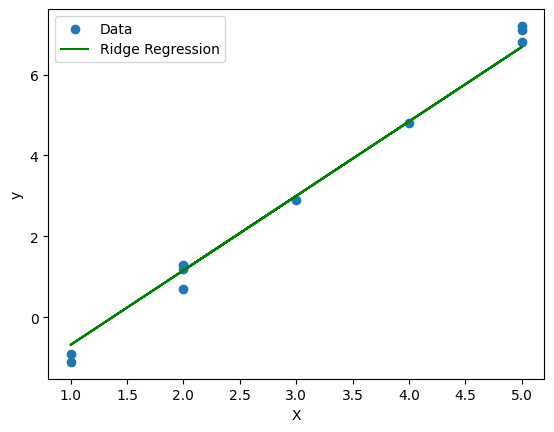

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = ridge.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='green', label="Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Untuk **lasso** regression, berikut adalah contoh implementasinya.

In [ ]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2) # Mengatur hyperparameter alpha=2
lasso.fit(X_train, y_train)

Lasso(alpha=2)

Setelah pelatihan selesai, **lasso** memiliki parameter hasil generalisasi lasso regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [ ]:
# Melihat nilai koefisien dan intersep persamaan lasso regression pada trained model

print("Koefisien persamaan regresi lasso: \n", lasso.coef_)
print("Intersep persamaan regresi lasso: \n", lasso.intercept_)

Koefisien persamaan regresi lasso: 
 [1.15833333]
Intersep persamaan regresi lasso: 
 -0.4750000000000001


Berdasarkan persamaan linear pada **lasso** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

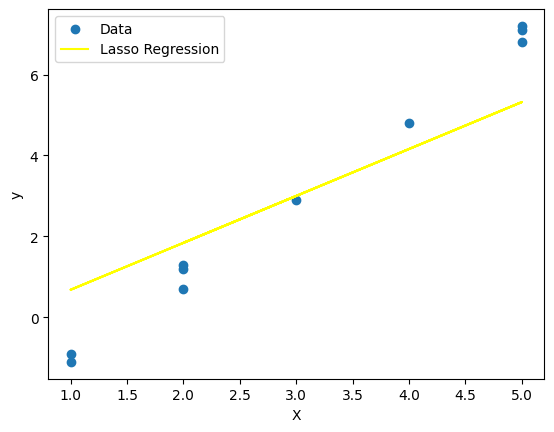

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Perhatikan plot visualisasi pada ketiga plot berikut ini. Seperti yang sudah disebutkan sebelumnya, model regresi linear memiliki kecenderungan untuk tidak overfit. Untuk itu, penerapan regularisasi melalui bobot penalti tidak memperbaiki kinerja dari model pada konteks data sederhana yang kita bentuk dan cenderung underfit.

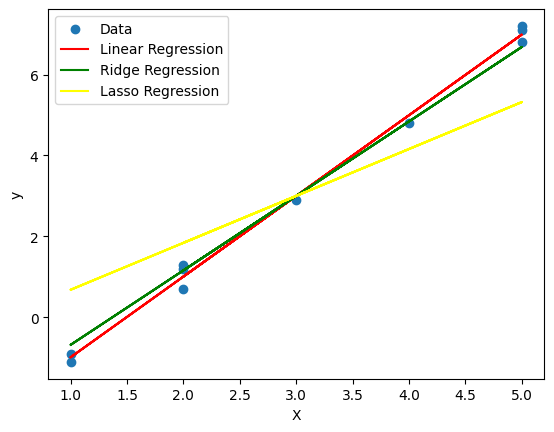

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred_linear = linear.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred_linear, color='red', label="Linear Regression")
plt.plot(X, y_pred_ridge, color='green', label="Ridge Regression")
plt.plot(X, y_pred_lasso, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

**NOTE**: Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil. Untuk implementasi lebih lanjutnya menggunakan **sklearn** dapat dilihat pada kedua link berikut:
* [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Penjelasan Dataset untuk *Linear Regression*, *Lasso Regression*, dan *Ridge Regression*

Dataset yang digunakan pada bagian linear regression, lasso regression, dan ridge regression adalah data asuransi kesehatan pada sekitar 1300 pengguna asuransi di Amerika Serikat. Dataset ini akan digunakan untuk memprediksi premi asuransi tahunan (jumlah yang dibayarkan setiap bulan) yang ditawarkan kepada pelanggan.

- **Age:** Umur pelanggan (18 — 64)

- **Sex:** Jenis kelamin pelanggan (male, female)

- **BMI:** Body Mass Index, salah satu indikator kesehatan (16 — 53.1)

- **Children:** Jumlah anak yang dimiliki (0 — 5)

- **Smoker:** Indikator pelanggan merokok atau tidak (yes, no)

- **Region:** Area tempat tinggal pelanggan (southwest, southeast, northwest, northeast)

- **Charges:** besaran premi asuransi pelanggan, sebagai target variable (1.12k — 63.8k)

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/harshsingh2209/medical-insurance-payout

In [ ]:
# Import dataset diamonds dan menampilkan 5 row teratas
import pandas as pd

df_insurance = pd.read_csv('insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Menampilkan informasi keseluruhan terkait dataset
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Soal 1: Data Preprocessing untuk Regresi

a) Persiapkan data untuk dilatih oleh model regresi.
Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training pada model. Berikut adalah persiapan yang `setidaknya` dilakukan sebagai berikut:
- Handle missing values dan duplikat data
- Melakukan encoding pada data kategorikal
- Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.
- Melakukan standarisasi pada dataset. Hint: Standarisasi dilatih terlebih dahulu pada data training, lalu lakukan standarisasi untuk kedua training dan testing set.

In [ ]:
def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

cek_missing_values(df_insurance)

,Total,Percent


Tidak ada missing value

In [ ]:
print('Jumlah duplikasi pada data adalah', df_insurance.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 2


Terdapat 2 duplikasi data. Walau hanya sedikit, tapi akan tetap saya handle. Saya akan buang data duplikat tersebut dengan tetap mempertahankan data yang pertama muncul.

In [ ]:
df_insurance.drop_duplicates(inplace=True)

In [ ]:
print('Jumlah duplikasi pada data adalah', df_insurance.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


In [ ]:
Q1 = df_insurance.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df_insurance.select_dtypes(include=[np.number]).quantile(0.75)

IQR = Q3 - Q1
RUB = Q3 + 1.5 * IQR
RLB = Q1 - 1.5 * IQR

jumlah_outlier_sebelum_dihandle = []

for col in df_insurance.select_dtypes(include=[np.number]).columns:
    outliers = ((df_insurance[col] < RLB[col]) | (df_insurance[col] > RUB[col])).sum()
    jumlah_outlier_sebelum_dihandle.append([col, outliers, outliers / len(df_insurance)])

index_output1 = list(range(0, len(jumlah_outlier_sebelum_dihandle)))

df_outliers = pd.DataFrame(jumlah_outlier_sebelum_dihandle, columns=['Column', 'Outlier_Pesebaran_Data', 'Persentase'], index=index_output1)
df_outliers_sorted = df_outliers.sort_values(by='Persentase', ascending=False, ignore_index=True)
df_outliers_sorted

,Column,Outlier_Pesebaran_Data,Persentase
0,charges,139,0.103964
1,bmi,9,0.006731
2,age,0,0.000000
3,children,0,0.000000


Setelah menghitung ouliter berdasarkan pesebaran datanya, saya menemukan terdapat kolom charges dan bmi mengandung outlier, untuk memilih penanganan outlier yang tepat, kita akan memeriksa distribusi data terlebih dahulu.

In [ ]:
outlier_var = ['charges', 'bmi']

for var in outlier_var:
    print("skewness variable {} adalah {}".format(var, df_insurance[var].skew()))

skewness variable charges adalah 1.5153909108403483
skewness variable bmi adalah 0.28391419385321137


Variable charges bersifat positively skewed.
Variable bmi bersiwat normal (masih berada di rentang [-0.5, 0.5])

In [ ]:
outlier_charges = (df_insurance['charges'] < 1120) | (df_insurance['charges'] > 63800)
print("Outlier pada atribut charges:")
print(outlier_charges.sum())

Outlier pada atribut charges:
0


In [ ]:
outlier_bmi = (df_insurance['bmi'] < 16) | (df_insurance['bmi'] > 53.1)
print("Outlier pada atribut bmi:")
print(outlier_bmi.sum())

Outlier pada atribut bmi:
2


Setelah dicek, ternyata terdapat 2 data di atribut bmi yang melebihi dari range yang diberikan oleh soal. Oleh karena itu, saya akan handle outlier tersebut dengan metode capping.

In [ ]:
df_insurance['bmi'] = df_insurance['bmi'].apply(lambda x: max(16, min(x, 53.1)))

In [ ]:
outlier_bmi = (df_insurance['bmi'] < 16) | (df_insurance['bmi'] > 53.1)
print("Outlier pada atribut bmi:")
print(outlier_bmi.sum())

Outlier pada atribut bmi:
0


Semua outlier sudah dihandle.

Setelah dilakukan analisis, saya menemukan bahwa variable sex dan smoker bersifat nominal dan hanya memiliki 2 jenis, sehingga saya memilih menggunakan metode one-hot encoding. Variable region memiliki lebih dari 2 jenis, sehingga disini saya akan melakukan encoding dengan menggunakan label encoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pandas as pd

df_insurance = pd.get_dummies(df_insurance, columns=['sex', 'smoker'], drop_first=True)

df_insurance.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,False,True
1,18,33.770,1,southeast,1725.55230,True,False
2,28,33.000,3,southeast,4449.46200,True,False
3,33,22.705,0,northwest,21984.47061,True,False
4,32,28.880,0,northwest,3866.85520,True,False


In [ ]:
label_encoder = LabelEncoder()

encode_columns = ['region']
for col in encode_columns:
    df_insurance[col] = label_encoder.fit_transform(df_insurance[col])

df_insurance.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,3,16884.92400,False,True
1,18,33.770,1,2,1725.55230,True,False
2,28,33.000,3,2,4449.46200,True,False
3,33,22.705,0,1,21984.47061,True,False
4,32,28.880,0,1,3866.85520,True,False


Milih variable dependen dan independen

In [ ]:
# Variabel independen
x = df_insurance.drop(["charges"], axis = 1)
x.head()

,age,bmi,children,region,sex_male,smoker_yes
0,19,27.900,0,3,False,True
1,18,33.770,1,2,True,False
2,28,33.000,3,2,True,False
3,33,22.705,0,1,True,False
4,32,28.880,0,1,True,False


In [ ]:
x.shape

(1337, 6)

In [ ]:
# Variabel dependen
y = df_insurance["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
y.shape

(1337,)

Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
selector = SelectKBest(f_regression, k=4)
X = selector.fit_transform(x, y)

In [ ]:
print("Jumlah feature (sebelum dilakukan feature selection ) :", x.shape[1])
print("Jumlah feature (setelah dilakukan feature selection ) :", X.shape[1])

Jumlah feature (sebelum dilakukan feature selection ) : 6
Jumlah feature (setelah dilakukan feature selection ) : 4


In [ ]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['age', 'bmi', 'children', 'smoker_yes'], dtype=object)

Fitur yang kita pilih adalah age, bmi, children, dan smoker_yes.

Bagi dataset training dan testing

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

Standarisasi

Berdasarkan pengecekan skewness yang sudah saya lakukan sebelumnya, kebanyakan data terdistribusi mendekati normal sehingga kita akan melakukan standarisasi menggunakan z-score (StandardScaler).

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

X_train_standarized = scaler.fit(X_train)
X_train_standarized = scaler.transform(X_train)
X_test_standarized = scaler.transform(X_test)

#### Soal 2: Linear Regression

a) Buatlah sebuah model regresi linear berdasarkan fitur-fitur yang terpilih sebelumnya dengan `charges` sebagai target prediksi. Tampilkan hasil prediksi pada keseluruhan data uji.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# membuat model regresi linear
linear_model = LinearRegression()
linear_model.fit(X_train_standarized, y_train)

LinearRegression()

In [ ]:
# Melakukan prediksi pada data testing
prediksi_linear_model = linear_model.predict(X_test_standarized)
prediksi_linear_model

array([  166.51952781, 17802.05993938, 25631.74224252,  1771.77949819,
       12398.99579534,  8368.30977393,  9422.44335709,  9967.32539981,
        5377.45113063, 33308.96929406,  5631.91081194, 14365.52139763,
        4834.66575965, 15365.6287541 , 11124.41646792, 28322.24077704,
       12027.13541181, 28167.96507063, 35457.58029816,  6428.06464157,
       39248.09279189, 14237.76878101,  -415.36896341,  7170.69596948,
       25658.43687947, 12368.32303194, 15882.85259715, 15336.74610394,
        1720.37550315, 39252.2003618 ,  1151.90094431, 12131.05467597,
       13918.57694585,  3590.93430982,  9952.46801553, 11295.1863926 ,
       36719.03220027,  2648.39130282, 38239.77207912, 28050.93664907,
        6842.13204968,  6194.18291264, 27367.22556543, 15148.48029628,
        1886.01235742, 35631.279013  ,  9444.07242929, 28925.84411404,
        7460.08726249, 11433.34016139, 11513.10124668, 29858.53514723,
       32077.64632753,  7559.55407891, 10460.82528243, 13696.33730398,
      

b) Tampilkan metrik evaluasi MAE, MSE, RMSE, dan R-squared untuk hasil prediksi yang sudah dibuat.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MAE
mae = mean_absolute_error(y_test, prediksi_linear_model)
print("Mean Absolute Error (MAE):", mae)

# MSE
mse = mean_squared_error(y_test, prediksi_linear_model)
print("Mean Squared Error (MSE):", mse)

# RMSE
rmse = mean_squared_error(y_test, prediksi_linear_model, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared
r_squared = r2_score(y_test, prediksi_linear_model)
print("R-squared:", r_squared)


Mean Absolute Error (MAE): 3916.32583117588
Mean Squared Error (MSE): 31074561.106200874
Root Mean Squared Error (RMSE): 5574.456126493496
R-squared: 0.7989537729334367


c) Visualisasikan kinerja model regresi linear yang sudah dipilih sebelumnya pada keseluruhan data uji. Berikan insight yang anda dapat dari visualisasi tersebut.

Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

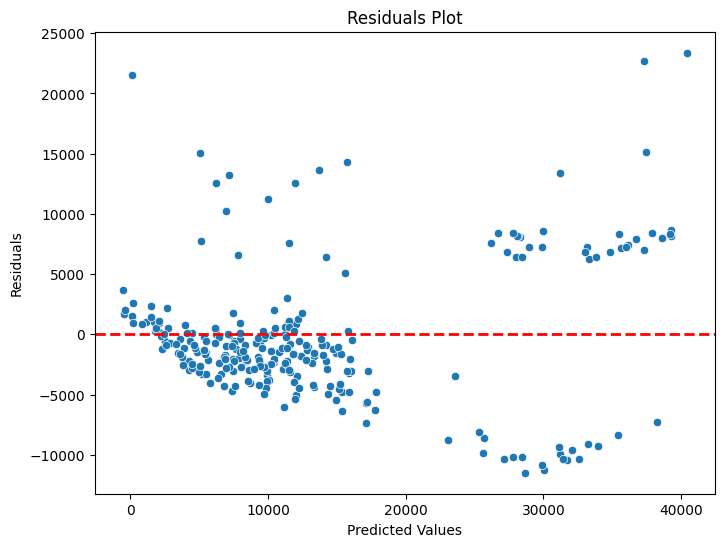

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung residual
residuals = y_test - prediksi_linear_model

# Membuat residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=prediksi_linear_model, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Dari grafik residu di atas, terlihat bahwa model kurang konsisten dalam memprediksi nilai yang lebih tinggi, yang ditandai dengan penyebaran residu yang semakin lebar ketika valuenya semakin tinggi.

d) Lakukan **cross validation** pada data latih dan tampilkan nilai R-squared setiap iterasi dan rata-ratanya untuk mendapatkan besaran kinerja sebenarnya dari model.

> Catatan: Jumlah split dibebaskan.

In [ ]:
# Menggunakan cross-validation untuk mendapatkan nilai R-squared
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(linear_model, X, y.ravel(), cv=kf, scoring='r2')

# Menampilkan nilai R-squared untuk setiap lipatan
print("R-squared for each fold:", cross_val_results)

R-squared for each fold: [0.80455385 0.71549877 0.75068248 0.67479472 0.74734012]


#### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [ ]:
list_alpha_lasso = [5,10,15,20,25]
list_nama_model_lasso = ["regresi lasso dengan apha 5",
                   "regresi lasso dengan alpha 10",
                   "regresi lasso dengan alpha 15",
                   "regresi lasso dengan alpha 20",
                   "regresi lasso dengan alpha 25"
                   ]

b) Buatlah (fit) model regresi lasso berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [ ]:
# alpha = 5
from sklearn.linear_model import Lasso

lasso_alpha5 = Lasso(alpha=5)
lasso_alpha5.fit(X_train_standarized, y_train)

Lasso(alpha=5)

In [ ]:
# alpha = 10
from sklearn.linear_model import Lasso

lasso_alpha10 = Lasso(alpha=10)
lasso_alpha10.fit(X_train_standarized, y_train)

Lasso(alpha=10)

In [ ]:
# alpha = 15
from sklearn.linear_model import Lasso

lasso_alpha15 = Lasso(alpha=15)
lasso_alpha15.fit(X_train_standarized, y_train)

Lasso(alpha=15)

In [ ]:
# alpha = 20
from sklearn.linear_model import Lasso

lasso_alpha20 = Lasso(alpha=20)
lasso_alpha20.fit(X_train_standarized, y_train)

Lasso(alpha=20)

In [ ]:
# alpha = 25
from sklearn.linear_model import Lasso

lasso_alpha25 = Lasso(alpha=25)
lasso_alpha25.fit(X_train_standarized, y_train)

Lasso(alpha=25)

c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model lasso regression pada testing set

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
models_list_lasso = [lasso_alpha5, lasso_alpha10,  lasso_alpha15, lasso_alpha20, lasso_alpha25]

mae_list_lasso = []
mse_list_lasso = []
rmse_list_lasso = []
r2_list_lasso = []

for model in models_list_lasso:
    y_pred = model.predict(X_test_standarized)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mae_list_lasso.append(mae)
    mse_list_lasso.append(mse)
    rmse_list_lasso.append(rmse)
    r2_list_lasso.append(r2)

# Menampilkan hasil
for i in range(len(models_list_lasso)):
    print(f"Model {list_nama_model_lasso[i]}:")
    print(f"MAE: {mae_list_lasso[i]}")
    print(f"MSE: {mse_list_lasso[i]}")
    print(f"RMSE: {rmse_list_lasso[i]}")
    print(f"R-squared: {r2_list_lasso[i]}")
    print()

Model regresi lasso dengan apha 5:
MAE: 3916.547451860444
MSE: 31085586.389331456
RMSE: 5575.444949896954
R-squared: 0.7988824415454191

Model regresi lasso dengan alpha 10:
MAE: 3916.851550818691
MSE: 31096813.868707802
RMSE: 5576.451727461451
R-squared: 0.7988098019879248

Model regresi lasso dengan alpha 15:
MAE: 3917.20012663471
MSE: 31108242.332929213
RMSE: 5577.476340866827
R-squared: 0.7987358620984755

Model regresi lasso dengan alpha 20:
MAE: 3917.548702450728
MSE: 31119871.781995673
RMSE: 5578.51878028529
R-squared: 0.7986606218770711

Model regresi lasso dengan alpha 25:
MAE: 3917.8972782667433
MSE: 31131702.215907183
RMSE: 5579.579035725472
R-squared: 0.7985840813237117



d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [ ]:
best_lasso = 0
idx_terpilih_lasso = 0
for i in range(len(r2_list_lasso)):
  if (best_lasso < r2_list_lasso[i]):
    best_lasso = r2_list_lasso[i]
    idx_terpilih_lasso = i

print(f"Model terbaik adalah model {list_nama_model_lasso[idx_terpilih_lasso]}, dengan nilai R-squared {best_lasso}")

Model terbaik adalah model regresi lasso dengan apha 5, dengan nilai R-squared 0.7988824415454191


e) Tampilkan array hasil prediksi dari model regresi lasso yang terpilih pada keseluruhan data uji.

In [ ]:
prediksi_lasso_with_alpha5 = lasso_alpha5.predict(X_test_standarized)
prediksi_lasso_with_alpha5

array([  184.36226112, 17784.65889405, 25635.2960229 ,  1788.17493053,
       12399.61902484,  8363.85440756,  9426.91145573,  9972.21037769,
        5386.52252003, 33290.55920788,  5637.85890517, 14358.14270837,
        4842.47197204, 15360.18113725, 11126.60464249, 28312.12443234,
       12027.45583676, 28163.63978043, 35432.7568127 ,  6433.84398114,
       39227.17590441, 14236.91779854,  -394.43827276,  7179.00647442,
       25657.66644563, 12359.60540108, 15870.76801163, 15319.9854953 ,
        1733.47215493, 39232.11731203,  1168.89770103, 12130.89670397,
       13914.20789815,  3605.05784267,  9948.86362577, 11297.53883205,
       36698.34204838,  2655.86152262, 38215.49263459, 28047.16525114,
        6844.09002018,  6196.48155176, 27366.17222403, 15143.53878193,
        1902.9849612 , 35611.43723811,  9451.02035093, 28912.58920175,
        7457.46753064, 11427.92621995, 11517.75716778, 29852.79992085,
       32065.52464166,  7565.50765464, 10457.67795717, 13685.64905152,
      

f)  Visualisasikan kinerja model regresi lasso yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

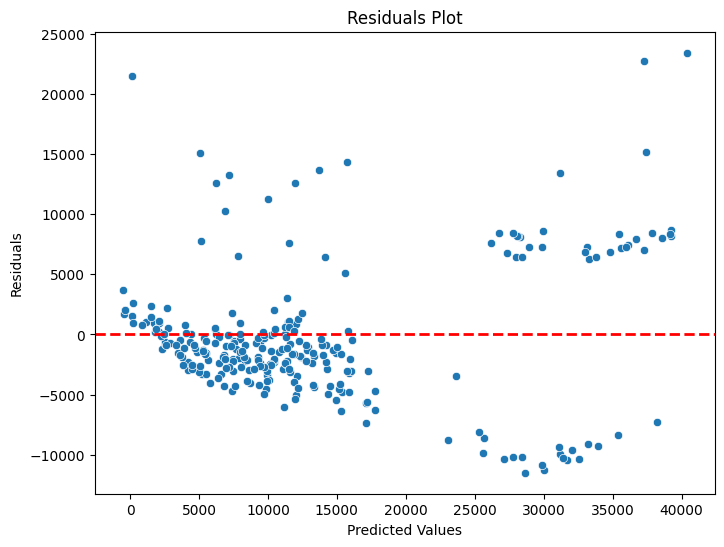

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung residual
residuals_lasso = y_test - prediksi_lasso_with_alpha5

# Membuat residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=prediksi_lasso_with_alpha5, y=residuals_lasso)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

`JAWABAN`

Setelah melakukan uji coba nilai alpha, saya menemukan bahwa mengubah nilai parameter alpha semakin besar malah menghasilkan kualitas hasil regresi yang semakin buruk, berdasarkan nilai R-squarednya yang semakin kecil.

Hal ini berarti nilai alpha berkorelasi negatih terhadap kualitas hasil regresi.

Hasil uji coba saya, model regresi lasso dengan nilai R-squared terbesar adalah model dengan nilai alpha terkecil, yakni alpha = 5.

ini terjadi karena justru terkadang regularisasi yang berat (nilai alpha yang tinggi) bisa menghilangkan fitur-fitur penting yang berkontribusi terhadap prediksi. Sehingga, model akan kehilangan informasi penting yang mempengaruhi kinerjanya.

#### Soal 4: Ridge Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [ ]:
list_alpha_ridge = [2,4,6,8,10]
list_nama_model_ridge = ["regresi ridge dengan apha 2",
                   "regresi ridge dengan alpha 4",
                   "regresi ridge dengan alpha 6",
                   "regresi ridge dengan alpha 8",
                   "regresi ridge dengan alpha 10"
                   ]

b) Buatlah (fit) model regresi ridge berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [ ]:
from sklearn.linear_model import Ridge

ridge_alpha2 = Ridge(alpha=2)
ridge_alpha2.fit(X_train_standarized, y_train)

Ridge(alpha=2)

In [ ]:
ridge_alpha4 = Ridge(alpha=4)
ridge_alpha4.fit(X_train_standarized, y_train)

Ridge(alpha=4)

In [ ]:
ridge_alpha6 = Ridge(alpha=6)
ridge_alpha6.fit(X_train_standarized, y_train)

Ridge(alpha=6)

In [ ]:
ridge_alpha8 = Ridge(alpha=8)
ridge_alpha8.fit(X_train_standarized, y_train)

Ridge(alpha=8)

In [ ]:
ridge_alpha10 = Ridge(alpha=10)
ridge_alpha10.fit(X_train_standarized, y_train)

Ridge(alpha=10)

c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model ridge regression pada testing set

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
models_list_ridge = [ridge_alpha2, ridge_alpha4, ridge_alpha6, ridge_alpha8, ridge_alpha10]

mae_list_ridge = []
mse_list_ridge = []
rmse_list_ridge = []
r2_list_ridge = []

for model in models_list_ridge:
    y_pred = model.predict(X_test_standarized)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mae_list_ridge.append(mae)
    mse_list_ridge.append(mse)
    rmse_list_ridge.append(rmse)
    r2_list_ridge.append(r2)

# Menampilkan hasil
for i in range(len(models_list_ridge)):
    print(f"Model {list_nama_model_ridge[i]}:")
    print(f"MAE: {mae_list_ridge[i]}")
    print(f"MSE: {mse_list_ridge[i]}")
    print(f"RMSE: {rmse_list_ridge[i]}")
    print(f"R-squared: {r2_list_ridge[i]}")
    print()

Model regresi ridge dengan apha 2:
MAE: 3919.9113851642505
MSE: 31108659.548375607
RMSE: 5577.5137425537205
R-squared: 0.7987331627975559

Model regresi ridge dengan alpha 4:
MAE: 3923.6265477019538
MSE: 31143365.954865556
RMSE: 5580.624154596469
R-squared: 0.7985086192535298

Model regresi ridge dengan alpha 6:
MAE: 3927.3271669058577
MSE: 31178672.79376783
RMSE: 5583.786599948804
R-squared: 0.7982801910312713

Model regresi ridge dengan alpha 8:
MAE: 3931.0133278666867
MSE: 31214572.620331734
RMSE: 5587.000323996029
R-squared: 0.7980479262968363

Model regresi ridge dengan alpha 10:
MAE: 3934.6851150133516
MSE: 31251058.075855546
RMSE: 5590.264580129955
R-squared: 0.7978118726595606



d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [ ]:
best_ridge = 0
idx_terpilih_ridge = 0
for i in range(len(r2_list_ridge)):
  if (best_ridge < r2_list_ridge[i]):
    best_ridge = r2_list_ridge[i]
    idx_terpilih_ridge = i

print(f"Model terbaik adalah model {list_nama_model_ridge[idx_terpilih_ridge]}, dengan nilai R-squared {best_ridge}")

Model terbaik adalah model regresi ridge dengan apha 2, dengan nilai R-squared 0.7987331627975559


e) Tampilkan array hasil prediksi dari model regresi ridge yang terpilih pada keseluruhan data uji.

In [ ]:
prediksi_ridge_with_alpha2 = ridge_alpha10.predict(X_test_standarized)
prediksi_ridge_with_alpha2

array([  281.04551077, 17771.12781753, 25512.58600648,  1877.17968501,
       12409.1272422 ,  8416.94711433,  9460.51875003,  9997.81919649,
        5447.54659109, 33122.28208248,  5705.76717828, 14361.88752963,
        4914.18392787, 15352.83603732, 11146.69294124, 28185.61549228,
       12035.15874201, 28035.12798966, 35258.72761351,  6492.55495268,
       39008.92822969, 14228.65512684,  -293.19895169,  7227.85595149,
       25541.14744385, 12377.41743593, 15863.69412476, 15327.23430147,
        1826.34112267, 39011.15062739,  1263.55932931, 12146.18229827,
       13913.78647698,  3679.08471961,  9987.18008093, 11315.01277342,
       36502.97800261,  2740.743172  , 38005.69440103, 27918.31200268,
        6902.64481703,  6254.54826514, 27236.98176719, 15137.22970453,
        1988.74529434, 35426.66172417,  9476.42621454, 28781.42058803,
        7515.79320147, 11446.59987249, 11525.19338826, 29708.12412622,
       31899.50323609,  7609.8222105 , 10480.99151062, 13693.52586927,
      

f)  Visualisasikan kinerja model regresi ridge yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

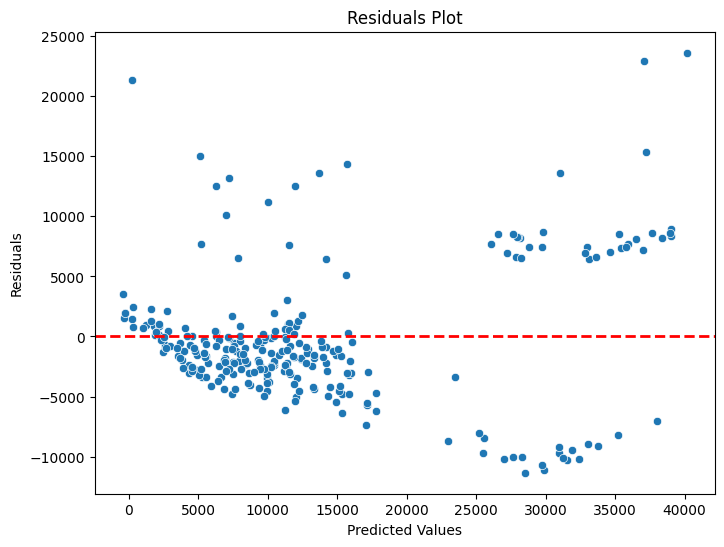

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung residual
residuals_ridge = y_test - prediksi_ridge_with_alpha2

# Membuat residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=prediksi_ridge_with_alpha2, y=residuals_ridge)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

g) Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

Karena regresi Lasso bisa menentukan fitur mana yang penting dan mana yang tidak dengan mengurangi bobot fitur yang kurang penting menjadi nol, sehingga secara otomatis memilih fitur yang paling berpengaruh untuk model.

Sementara itu, Regresi Ridge hanya mengurangi bobot fitur TANPA pernah membuatnya nol, jadi semua fitur tetap dipertahankan meski beberapa mungkin tidak terlalu penting. Sehingga tidak bisa digunakan untuk feature selection.

# Intro to Linear Models for Classification

### Logistic Regression

Logistic regression adalah model linear yang hampir mirip dengan linear regression. Namun, alih-alih memprediksi nilai kontinu, logistic regression hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor, atau lebih tepatnya binary classifier. Contoh visualisasinya adalah sebagai berikut.

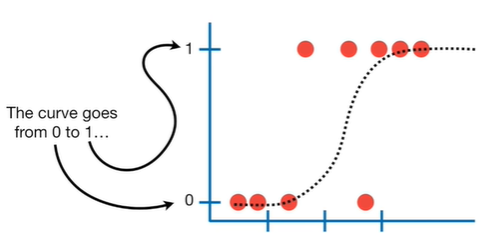

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

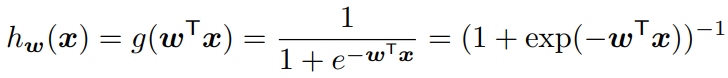

Model logistic regression memanfaatkan fungsi sigmoid $g=\frac{1}{1+e^{-z}}$ untuk mentransformasi hasil perkalian $z=w^Tx$ menjadi rentang 0-1. Output dari fungsi sigmoid mencerminkan peluang suatu data diklasifikasi sebagai kelas 1. Untuk mengubah bentuk peluang menjadi kelas, diperlukan threshold yang membatasi penentuan kelas sesuai dengan keperluan dari dataset (tidak mesti 0.5). Pemilihan threshold ini dapat dipilih menggunakan berbagai metode, salah satunya dengan ROC Curve, yang dapat Anda dalami lebih lanjut melalui slide :)

![Logistic regression threshold](https://miro.medium.com/v2/resize:fit:483/0*KZu2_AY6Oxr86dWd.png)

Sumber gambar: https://morihosseini.medium.com/mastering-logistic-regression-thresholds-b34fe07f09f5

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, tidak seperti linear regression yang meminimalkan perbedaan hasil prediksi, di sini logistic regression memaksimalkan kesamaan hasil prediksi dengan data aktual.

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa Anda pelajari sendiri dari slide :D). Berikut adalah persamaan likelihood yang ingin dimaksimalkan tersebut.

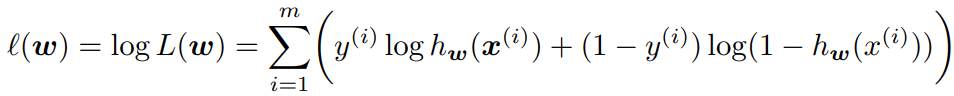

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Logistic Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0 atau 1.


In [ ]:
# Membentuk data buatan
x1  = np.array([6, 9, 4, 6, 8, 4, 6, 2, 9, 2])
x2  = np.array([8, 7, 3, 5, 9, 6, 7, 5, 9, 3])

X_train = np.stack((x1, x2), axis=1)
y_logistic_train   = np.where((x1 > 5) & (x2 > 5), 1, 0)

print('X: ', X_train)
print('y: ', y_logistic_train)

X:  [[6 8]
 [9 7]
 [4 3]
 [6 5]
 [8 9]
 [4 6]
 [6 7]
 [2 5]
 [9 9]
 [2 3]]
y:  [1 1 0 0 1 0 1 0 1 0]


In [ ]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [ ]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan

X_test = np.array([[8, 5], [3, 6]])
y_test = np.array([0, 0])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[1 0]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut.

In [ ]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2
logistic.intercept_, logistic.coef_
weights = [logistic.intercept_[0],logistic.coef_[0,0], logistic.coef_[0,1]]
print(weights)

[-10.12198936535299, 0.6927561778286976, 0.9828742808825579]


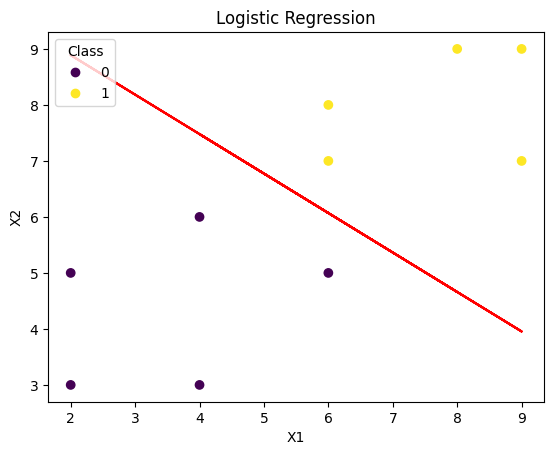

In [ ]:
# Plotting the decision boundary
x2_test = (-weights[0] - (weights[1] * x1)) / weights[2]
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_logistic_train, cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2_test, color='red', label='Decision Boundary')
plt.show()

Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [ ]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


### Penjelasan Dataset untuk *Logistic Regression*

<img src="https://images.unsplash.com/photo-1568581357391-c71a1675ef93?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="dollars" width=300/>

Dataset yang digunakan pada bagian logistic regression adalah data terkait *fake bills*. Model yang akan dibuat akan memprediksi apakah suatu invoice/bill asli atau tidak. Berikut penjelasan masing-masing kolom pada data.

- **is_genuine**: target variable yang menunjukan apakah bill asli atau tidak (true, false)

- **diagonal**: ukuran diagonal dalam mm

- **height_left**: tinggi dari sisi kiri bill dalam mm

- **height_right**: tinggi dari sisi kanan bill dalam mm

- **margin_low**: ukuran margin bawah dalam mm

- **margin_up**: ukuran margin atas dalam mm

- **length**: panjang total bill dalam mm


**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/alexandrepetit881234/fake-bills

In [ ]:
import pandas as pd

df_bill = pd.read_csv('fake_bills.csv', delimiter=';')
df_bill.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
# Menampilkan informasi keseluruhan terkait dataset
df_bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


#### Soal 5: Logistic Regression

a) Lakukan pengecekan dan penanganan missing values serta data duplikat.

In [ ]:
def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

cek_missing_values(df_bill)

,Total,Percent
margin_low,37,0.024667


Terdapat 37 missing value pada atribut margin_low

In [ ]:
skewness_margin_low = df_bill['margin_low'].dropna().skew()
skewness_margin_low

0.8630655172248257

Karena skewness dari atribut margin_low masih mendekati distribusi normal, saya memilih untuk handle missing valuenya dengan mengisi-nya pakai mean.

In [ ]:
mean_margin_low = df_bill['margin_low'].mean()

df_bill['margin_low'].fillna(mean_margin_low, inplace=True)

df_bill.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Sudah tidak ada lagi missing value

In [ ]:
print('Jumlah duplikasi pada data adalah', df_bill.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


Tidak ada duplikat data.

b) Lakukan encoding pada data kategorikal di dataset dan bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

Encoding menggunakan One-Hot encoding

In [ ]:
df_bill = pd.get_dummies(df_bill)
df_bill.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


Membagi data set

In [ ]:
x = df_bill.drop(['is_genuine'],  axis = 1)
x

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28
1496,172.19,104.63,104.44,5.27,3.37,110.97
1497,171.80,104.01,104.12,5.51,3.36,111.95
1498,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
y = df_bill['is_genuine']
y

0        True
1        True
2        True
3        True
4        True
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Name: is_genuine, Length: 1500, dtype: bool

Bagi dataset jadi train 80% dan test 20%

In [ ]:
X_bill_train, X_bill_test, y_bill_train, y_bill_test = train_test_split(x, y, test_size=.2, stratify=y, random_state = 123)

c) Buatlah suatu model logistic regression berdasarkan data asli serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [ ]:
model_logistic_bill = LogisticRegression()
model_logistic_bill.fit(X_bill_train, y_bill_train)

LogisticRegression()

In [ ]:
bill_prediction = model_logistic_bill.predict(X_bill_test)

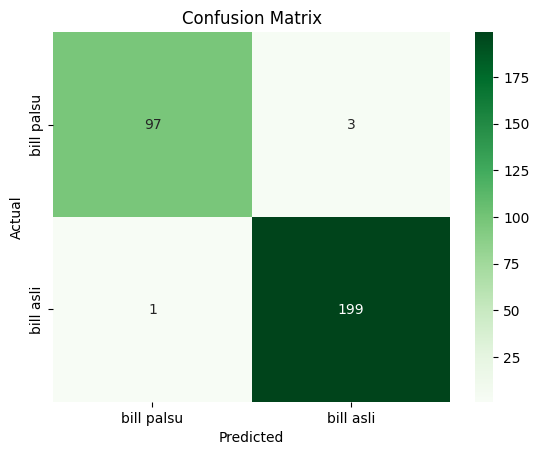

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_bill_test, bill_prediction)

# Menampilkan confusion matrix (berbentuk heatmap)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['bill palsu', 'bill asli'], yticklabels=['bill palsu', 'bill asli'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Hasil evaluasi metrik
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score

print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_bill_test, bill_prediction, zero_division=0)))
print()

print("Informasi lebih lengkap")
print('F1 Macro Average:', f1_score(y_bill_test, bill_prediction, average='macro'))
print('F1 Micro Average:', f1_score(y_bill_test, bill_prediction, average='micro'))
print('Precision Macro Average:', precision_score(y_bill_test, bill_prediction, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_bill_test, bill_prediction, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_bill_test, bill_prediction, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_bill_test, bill_prediction, average='micro',zero_division=0))
print()


Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



Informasi lebih lengkap
F1 Macro Average: 0.9849238655208805
F1 Micro Average: 0.9866666666666668
Precision Macro Average: 0.9874722166094161
Precision Micro Average: 0.9866666666666667
Recall Macro Average: 0.9824999999999999
Recall Micro Average: 0.9866666666666667



d) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [ ]:
bill_var = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

for var in bill_var:
    print("skewness variable {} adalah {}".format(var, df_bill[var].skew()))

skewness variable diagonal adalah -0.03330670158414046
skewness variable height_left adalah -0.09212062623390109
skewness variable height_right adalah -0.0003275471945634819
skewness variable margin_low adalah 0.8738889156955729
skewness variable margin_up adalah 0.1459378262087844
skewness variable length adalah -0.8159565381523239


Karena pesebaran data mayoritas memiliki skewness di rentang [-0.5, 0.5], maka akan digunakan z-score.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_bill = StandardScaler()
scaler_bill.fit(X_bill_train[bill_var])

# Standardisasi
X_bill_train[bill_var] = scaler_bill.transform(X_bill_train[bill_var])
X_bill_test[bill_var] = scaler_bill.transform(X_bill_test[bill_var])

e) Buatlah suatu model logistic regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [ ]:
model_logistic_scaled = LogisticRegression()
model_logistic_scaled.fit(X_bill_train, y_bill_train)

LogisticRegression()

In [ ]:
prediction_bill_scaled = model_logistic_scaled.predict(X_bill_test)

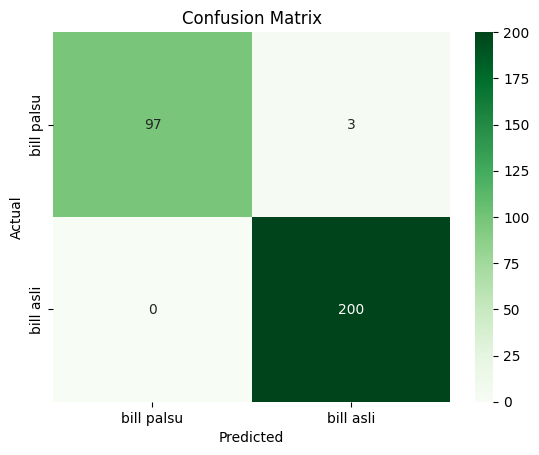

In [ ]:
cm_bill_scaled = confusion_matrix(y_bill_test, prediction_bill_scaled)

# Menampilkan confusion matrix dalam bentuk heatmap
sns.heatmap(cm_bill_scaled, annot=True, fmt='d', cmap='Greens',
            xticklabels=['bill palsu', 'bill asli'],
            yticklabels=['bill palsu', 'bill asli'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Hasil evaluasi metrik
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score

print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_bill_test, prediction_bill_scaled, zero_division=0)))
print()

print("Informasi lebih lengkap")
print('F1 Macro Average:', f1_score(y_bill_test, prediction_bill_scaled, average='macro'))
print('F1 Micro Average:', f1_score(y_bill_test, prediction_bill_scaled, average='micro'))
print('Precision Macro Average:', precision_score(y_bill_test, prediction_bill_scaled, average='macro', zero_division=0))
print('Precision Micro Average:', precision_score(y_bill_test, prediction_bill_scaled, average='micro', zero_division=0))
print('Recall Macro Average:', recall_score(y_bill_test, prediction_bill_scaled, average='macro', zero_division=0))
print('Recall Micro Average:', recall_score(y_bill_test, prediction_bill_scaled, average='micro', zero_division=0))
print()

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

       False       1.00      0.97      0.98       100
        True       0.99      1.00      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



Informasi lebih lengkap
F1 Macro Average: 0.9886637024347847
F1 Micro Average: 0.99
Precision Macro Average: 0.9926108374384237
Precision Micro Average: 0.99
Recall Macro Average: 0.985
Recall Micro Average: 0.99



f) Dari kedua model yang dibangun dengan data yang dinormalisasi dan data yang tidak dinormalisasi, manakah yang memberikan performa terbaik? Berikan analisis Anda mengenai hal tersebut.

1. Model dengan Data yang Tidak Dinormalisasi:
* Accuracy: 99%
* Precision Macro Average: 98.7%
* Recall Macro Average: 98.2%
* F1 Macro Average: 98.4%
* Precision Micro Average: 98.7%
* Recall Micro Average: 98.7%
* F1 Micro Average: 98.7%


2. Model dengan Data yang Dinormalisasi:
* Accuracy: 99%
* Precision Macro Average: 99.3%
* Recall Macro Average: 98.5%
* F1 Macro Average: 98.9%
* Precision Micro Average: 99.0%
* Recall Micro Average: 99.0%
* F1 Micro Average: 99.0%

Kedua model memberikan performa yang sangat baik (nilai akurasi 99%).

Namun ada sedikit perbedaan sekitar 3-7% peningkatan pada data yang sudah dinormalisasi, yang paling signifikan terlihat pada Precision Macro Average. Hal ini menunjukkan bahwa normalisasi memperbaiki konsistensi model dalam memprediksi kelas dengan lebih seimbang, bisa dilihat dari adanya peningkatan skor F1.

Sehingga dapat disimpulkan bawha model dengan data yang dinormalisasi lebih baik.

### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Model ini dapat menghasilkan output data untuk lebih dari dua kelas. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmax regression:

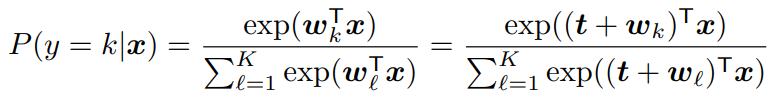

Persamaan likelihood softmax regression:

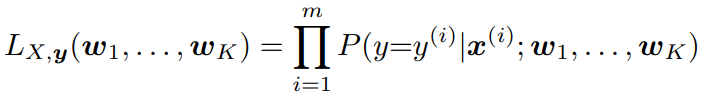

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Softmax Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0, 1, dan 2.

In [ ]:
# Membentuk data buatan
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 7, 5, 7])
x2  = np.array([3, 6, 2, 3, 5, 6, 3, 4, 3, 6])

X_train = np.stack((x1, x2), axis=1)
# [0, 1, 0, 2, 2, 1, 0, 2, 2, 2]
y_softmax_train   = np.array([2, 0, 2, 1, 1, 0, 2, 1, 1, 1])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[2 3]
 [3 6]
 [2 2]
 [4 3]
 [5 5]
 [2 6]
 [1 3]
 [7 4]
 [5 3]
 [7 6]]
y:  [2 0 2 1 1 0 2 1 1 1]


In [ ]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set

softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)

LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [ ]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan

X_test = np.array([[2, 3], [7, 5]])
y_softmax_test = np.array([2, 1])

y_logistic_predict = softmax.predict(X_test)

print(y_logistic_predict)

[2 1]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. w0, w1, dan w2 yang dihasilkan masing-masing memiliki 3 nilai yang merepresentasikan tiap boundary.

In [ ]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
softmax.intercept_, softmax.coef_
print(softmax.intercept_, softmax.coef_)

[-2.73396481 -1.90863029  4.6425951 ] [[-0.30513117  0.83682801]
 [ 0.99982232 -0.21460023]
 [-0.69469115 -0.62222778]]


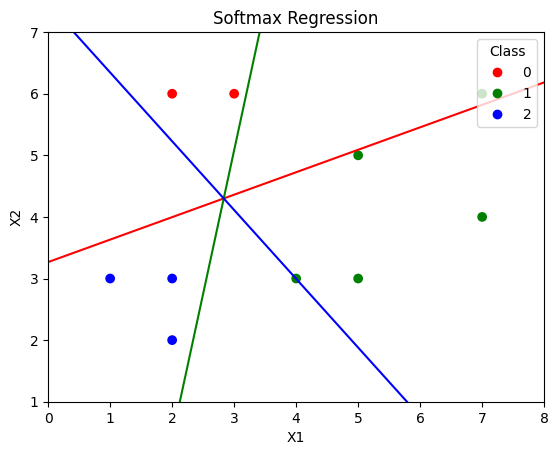

In [ ]:
# Plotting the decision boundary
import matplotlib

x1_line = np.array([x1.min() - 1, x1.max() + 1])
boundary_0 = (-softmax.intercept_[0] - (softmax.coef_[0][0] * x1_line)) / softmax.coef_[0][1]
boundary_1 = (-softmax.intercept_[1] - (softmax.coef_[1][0] * x1_line)) / softmax.coef_[1][1]
boundary_2 = (-softmax.intercept_[2] - (softmax.coef_[2][0] * x1_line)) / softmax.coef_[2][1]

fig, ax = plt.subplots()
plt.title('Softmax Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_softmax_train, cmap=matplotlib.colors.ListedColormap(["red", "green", "blue"]))
plt.legend(*scatter.legend_elements(),
           loc = 'upper right',
           title = 'Class')
plt.plot(x1_line, boundary_0, color='red')
plt.plot(x1_line, boundary_1, color='green')
plt.plot(x1_line, boundary_2, color='blue')
ax.set_xlim([x1.min() - 1, x1.max() + 1])
ax.set_ylim([x2.min() - 1, x2.max() + 1])
plt.show()

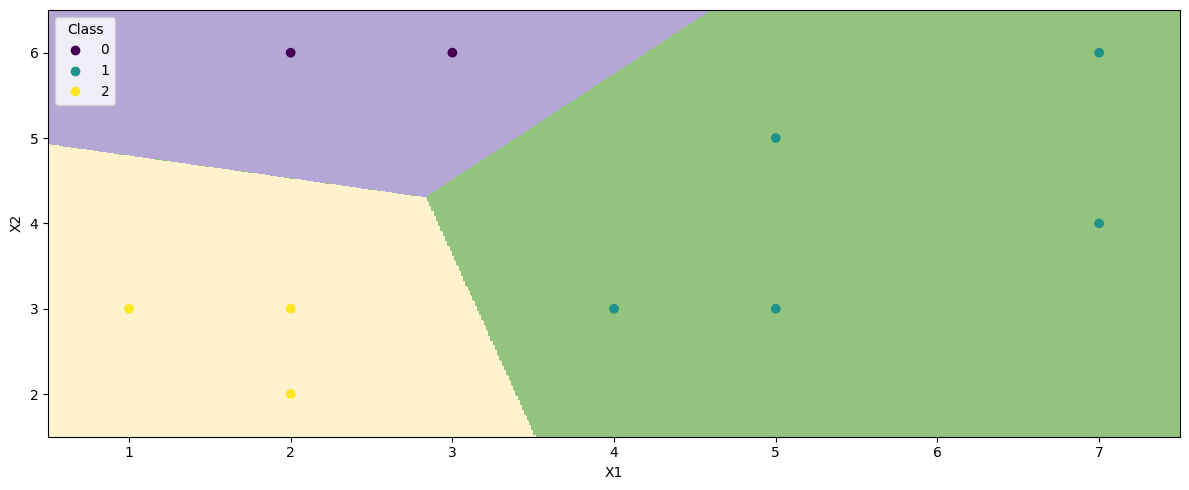

In [ ]:
# Plotting the decision boundary using contour plot
x1_mesh, x2_mesh = np.meshgrid(
    np.linspace(x1.min() - 0.5, x1.max() + 0.5, 500).reshape(-1, 1),
    np.linspace(x2.min() - 0.5, x2.max() + 0.5, 500).reshape(-1, 1)
)

X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred = softmax.predict(X_new)
zz = y_pred.reshape(x1_mesh.shape)

plt.figure(figsize=(12, 5))
plt.contourf(x1_mesh, x2_mesh, zz, cmap=matplotlib.colors.ListedColormap(['#b4a7d6','#93c47d','#fff2cc']))
scatter = plt.scatter(x1, x2, c=y_softmax_train)
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model berhasil memprediksi benar pada semua (2 buah) data uji. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 1.

In [ ]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_softmax_test))

Nilai rata-rata akurasi: 1.0


### Penjelasan Dataset untuk *Softmax Regression*

<img src="https://cdn.mos.cms.futurecdn.net/LZUsfgcXH7WMeVvuHYsoSA-1200-80.png" alt="Stars" width=300/>

Dataset yang digunakan pada bagian softmax regression adalah data terkait klasifikasi jenis bintang. Berikut penjelasan masing-masing kolom pada data.

- **Temperature**: Suhu bintang dalam Kelvin.

- **L (Lo)**: Luminositas relatif atau radiasi foton matahari yang dikeluarkan oleh bintang.

- **R (Ro)**: Jari-jari bintang relatif terhadap matahari.

- **Absolute Magnitude (A_M)**: Magnitudo kecerahan yang tampak pada sebuah bintang.

- **Color**: Warna bintang secara umum.

- **Spectral_Class**: Tipe spectral asteroid SMASS (O,B,A,F,G,K,M), [lebih lanjut](https://en.wikipedia.org/wiki/Asteroid_spectral_types)

- **Class**: Jenis Bintang, (0 = Red Dwarf, 1 = Brown Dwarf, 2 = White Dwarf, 3 = Main Sequence, 4 = Super Giants, 5 = Hyper Giants)

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/brsdincer/star-type-classification


In [ ]:
import pandas as pd

# Import dataset stars dan menampilkan 5 row teratas
df_stars = pd.read_csv('stars.csv')

df_stars.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [ ]:
# Menampilkan informasi keseluruhan terkait dataset
df_stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


#### Soal 6: Softmax Regression

a) Bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing. Gunakan `random_state=12` untuk splitting data.

In [ ]:
x = df_stars.drop(['Type'],  axis = 1)
x

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


In [ ]:
y = df_stars['Type']
y

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Type, Length: 240, dtype: int64

In [ ]:
X_train_stars, X_test_stars, y_train_stars, y_test_stars = train_test_split(x, y, test_size=0.2,stratify=y, random_state=12)

b) Lakukan encoding pada fitur kategorikal. Hint: latih encoder pada data training terlebih dahulu, baru diterapkan pada data testing.

Gunakan label encoder karena data kategorikal pada dataset ini berisi lebih dari 2 jenis.

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Color', 'Spectral_Class']

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train_stars[col] = le.fit_transform(X_train_stars[col])
    X_test_stars[col] = le.transform(X_test_stars[col])
    label_encoders[col] = le

c) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [ ]:
stars_var_numeric = ['Temperature', 'L', 'R', 'A_M']

for var in stars_var_numeric:
    print("skewness variable {} adalah {}".format(var, df_stars[var].skew()))

skewness variable Temperature adalah 1.3215683436504677
skewness variable L adalah 2.0680688796721722
skewness variable R adalah 1.9468004140008202
skewness variable A_M adalah -0.12153958780434422


Data cenderung terdistribusi secara skewed, maka akan digunakan min max scaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

non_categorical_cols = [col for col in X_train_stars.columns if col not in ['Color', 'Spectral_Class']]

scaler.fit(X_train_stars[non_categorical_cols])

# Transform the non-categorical columns in both training and testing sets
X_train_stars[non_categorical_cols] = scaler.transform(X_train_stars[non_categorical_cols])
X_test_stars[non_categorical_cols] = scaler.transform(X_test_stars[non_categorical_cols])

d) Buatlah suatu model softmax regression berdasarkan data yang telah dinormalisasi serta tampilkan nilai intercept dan parameter $w_0, w_1$, dst. untuk setiap kelas output yang telah dilatih

In [ ]:
from sklearn.linear_model import LogisticRegression

softmax = LogisticRegression(multi_class='multinomial', max_iter=1200)
softmax.fit(X_train_stars, y_train_stars)

LogisticRegression(max_iter=1200, multi_class='multinomial')

In [ ]:
softmax.intercept_, softmax.coef_
print(softmax.intercept_, softmax.coef_)

[-6.9095222  -6.58490922  3.47139057  4.31922585  3.37000702  2.33380799] [[-0.39832158 -0.32422071 -0.21906118  3.2239969   0.16479304  0.96804483]
 [-0.52434584 -1.02815459 -0.78123185  0.6009197   0.25018066  1.18567822]
 [ 0.10439184 -0.28394303 -0.22391443  2.78661832 -0.12776911 -1.18626973]
 [ 1.70282589 -0.83158952 -1.28541608 -2.40983083  0.05246969 -0.69695447]
 [-0.93897673  1.38326211 -1.3142274  -2.14686544 -0.29951498  0.04483547]
 [ 0.05442642  1.08464574  3.82385093 -2.05483865 -0.0401593  -0.31533431]]


e) Tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [ ]:
# Prediksi testing data
stars_prediction = softmax.predict(X_test_stars)

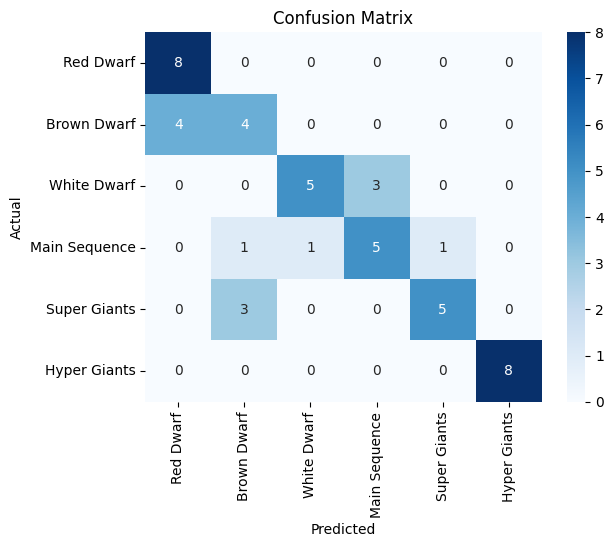

In [ ]:
# Confusion matriks
cm_stars = confusion_matrix(y_test_stars, stars_prediction)

# Class: Jenis Bintang, (0 = Red Dwarf, 1 = Brown Dwarf, 2 = White Dwarf, 3 = Main Sequence, 4 = Super Giants, 5 = Hyper Giants)

# Heatmap
sns.heatmap(cm_stars, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Red Dwarf", "Brown Dwarf", "White Dwarf", "Main Sequence","Super Giants","Hyper Giants"],
            yticklabels=["Red Dwarf", "Brown Dwarf", "White Dwarf", "Main Sequence","Super Giants","Hyper Giants"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score

print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test_stars, stars_prediction, zero_division=0)))
print()

print("Informasi lebih lengkap")
print('F1 Macro Average:', f1_score(y_test_stars, stars_prediction, average='macro'))
print('F1 Micro Average:', f1_score(y_test_stars, stars_prediction, average='micro'))
print('Precision Macro Average:', precision_score(y_test_stars, stars_prediction, average='macro', zero_division=0))
print('Precision Micro Average:', precision_score(y_test_stars, stars_prediction, average='micro', zero_division=0))
print('Recall Macro Average:', recall_score(y_test_stars, stars_prediction, average='macro', zero_division=0))
print('Recall Micro Average:', recall_score(y_test_stars, stars_prediction, average='micro', zero_division=0))
print()

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       0.50      0.50      0.50         8
           2       0.83      0.62      0.71         8
           3       0.62      0.62      0.62         8
           4       0.83      0.62      0.71         8
           5       1.00      1.00      1.00         8

    accuracy                           0.73        48
   macro avg       0.74      0.73      0.73        48
weighted avg       0.74      0.73      0.73        48



Informasi lebih lengkap
F1 Macro Average: 0.7255952380952381
F1 Micro Average: 0.7291666666666665
Precision Macro Average: 0.7430555555555557
Precision Micro Average: 0.7291666666666666
Recall Macro Average: 0.7291666666666666
Recall Micro Average: 0.7291666666666666



f) Dari persamaan model yang telah dibuat, jelaskan bagaimana pengaruh fitur `A_M` terhadap likelihood prediksi kelas.

Hint: Anda dapat menganalisis dari nilai bobot yang ditampilkan pada soal d). Tambahkan cell code jika perlu.

In [ ]:
# Mendapatkan indeks kolom untuk fitur A_M
index_of_AM = X_train_stars.columns.get_loc("A_M")

# Menampilkan koefisien untuk A_M untuk setiap kelas
class_labels = ["Red Dwarf", "Brown Dwarf", "White Dwarf", "Main Sequence", "Super Giants", "Hyper Giants"]
for i, class_label in enumerate(class_labels):
    coefficient = softmax.coef_[i, index_of_AM]
    print(f"Koefisien untuk A_M pada type '{class_label}' adalah: {coefficient:.4f}")


Koefisien untuk A_M pada type 'Red Dwarf' adalah: 3.2240
Koefisien untuk A_M pada type 'Brown Dwarf' adalah: 0.6009
Koefisien untuk A_M pada type 'White Dwarf' adalah: 2.7866
Koefisien untuk A_M pada type 'Main Sequence' adalah: -2.4098
Koefisien untuk A_M pada type 'Super Giants' adalah: -2.1469
Koefisien untuk A_M pada type 'Hyper Giants' adalah: -2.0548


Berdasarkan penjelasan di atas. Kita bisa menyimpulkan bahwa A_M memiliki pengaruh yang berbeda terhadap masing-masing kelas.

1. Red Dwarf: Koefisien positif yang sangat tinggi (3.2240) menunjukkan bahwa peningkatan nilai A_M sangat meningkatkan likelihood bahwa bintang diklasifikasikan sebagai Red Dwarf.

2. Brown Dwarf: Koefisien positif yang lebih rendah (0.6009) menunjukkan bahwa peningkatan nilai A_M juga meningkatkan likelihood bahwa bintang diklasifikasikan sebagai Brown Dwarf, tetapi efeknya tidak sekuat pada kelas Red Dwarf.

3. White Dwarf: Mirip dengan Red Dwarf, koefisien yang cukup tinggi (2.7866) menunjukkan bahwa peningkatan A_M meningkatkan likelihood klasifikasi sebagai White Dwarf.

4. Main Sequence, Super Giants, dan Hyper Giants: Koefisien negatif yang signifikan untuk ketiga kelas ini (-2.4098, -2.1469, -2.0548) menunjukkan bahwa penurunan nilai A_M meningkatkan likelihood bintang diklasifikasikan dalam salah satu dari kelas ini.

## Kompetisi Kaggle Regresi Berdasarkan Linear Models [10 Poin]

Dalam rangka menerapkan pemahaman kalian pada materi model linear untuk kasus regresi, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 6 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini atau kalian juga dapat mengaksesnya melalui laman course KASDAD pada SCELE. Klik tautan tersebut untuk mengakses halaman kompetisi. Anda dapat mengunduh dataset yang digunakan dari halaman kompetisi tersebut.
*   Kerjakan solusi Anda menggunakan notebook ini. Anda dibebaskan untuk menambahkan cell code dan markdown sesuai kebutuhan.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Linear Model for Regression](https://www.kaggle.com/t/eb875d3751f34371b00c1f19fa7381e2)

In [ ]:
import pandas as pd

train_data = pd.read_csv('life_expectancy_train.csv')

train_data.head()


,Id,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,272007,Cabo Verde,2007,Developing,72.3,126.0,0,5.28,345.463714,96.0,...,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9
1,272001,Cabo Verde,2001,Developing,73.0,152.0,0,3.81,150.743486,NaN,...,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0
2,1432011,Saint Lucia,2011,Developing,74.6,143.0,0,10.43,0.000000,99.0,...,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9
3,1752013,Tunisia,2013,Developing,74.9,13.0,3,1.29,594.645310,98.0,...,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7
4,232002,Brunei Darussalam,2002,Developing,74.8,95.0,0,0.13,941.703687,99.0,...,99.0,3.40,94.0,0.1,16846.219800,NaN,6.7,6.1,0.820,13.3


In [ ]:
test_data = pd.read_csv('life_expectancy_test.csv')

test_data.head()

,Id,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1672006,Syrian Arab Republic,2006,Developing,123.0,8,0.97,122.652333,83.0,517,...,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,6.3,0.636,11.4
1,402006,Croatia,2006,Developed,113.0,0,11.83,1555.651986,NaN,1,...,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,1.8,0.783,13.9
2,1122007,Montenegro,2007,Developing,125.0,0,4.98,678.518894,9.0,0,...,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
3,112014,Bahrain,2014,Developing,7.0,0,1.57,367.255674,98.0,46,...,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,6.0,0.820,14.5
4,872000,Kenya,2000,Developing,428.0,77,1.51,0.681686,NaN,21002,...,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,9.1,0.448,8.4


In [ ]:
missing_data_train = train_data.isnull().mean() * 100
missing_data_test = test_data.isnull().mean() * 100

missing_data_train, missing_data_test


(Id                                  0.000000
 Country                             0.000000
 Year                                0.000000
 Status                              0.000000
 Life expectancy                     0.340426
 Adult Mortality                     0.340426
 infant deaths                       0.000000
 Alcohol                             6.723404
 percentage expenditure              0.000000
 Hepatitis B                        18.680851
 Measles                             0.000000
  BMI                                1.148936
 under-five deaths                   0.000000
 Polio                               0.595745
 Total expenditure                   7.872340
 Diphtheria                          0.595745
  HIV/AIDS                           0.000000
 GDP                                14.680851
 Population                         21.957447
  thinness  1-19 years               1.148936
  thinness 5-9 years                 1.148936
 Income composition of resources  

In [ ]:
columns_to_fill_train = ['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio',
                         'Total expenditure', 'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years',
                         ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
columns_to_fill_test = ['Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio',
                        'Total expenditure', 'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years',
                        ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

for column in columns_to_fill_train:
    median_train = train_data[column].median()
    train_data[column].fillna(median_train, inplace=True)

for column in columns_to_fill_test:
    median_test = test_data[column].median()
    test_data[column].fillna(median_test, inplace=True)

train_data.isnull().sum(), test_data.isnull().sum()


(Id                                 0
 Country                            0
 Year                               0
 Status                             0
 Life expectancy                    0
 Adult Mortality                    0
 infant deaths                      0
 Alcohol                            0
 percentage expenditure             0
 Hepatitis B                        0
 Measles                            0
  BMI                               0
 under-five deaths                  0
 Polio                              0
 Total expenditure                  0
 Diphtheria                         0
  HIV/AIDS                          0
 GDP                                0
 Population                         0
  thinness  1-19 years              0
  thinness 5-9 years                0
 Income composition of resources    0
 Schooling                          0
 dtype: int64,
 Id                                 0
 Country                            0
 Year                              

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encoding 'Status'
label_encoder = LabelEncoder()
train_data['Status'] = label_encoder.fit_transform(train_data['Status'])
test_data['Status'] = label_encoder.transform(test_data['Status'])

# One-hot encoding 'Country'
onehot_encoder = OneHotEncoder(sparse=False)
country_encoded_train = onehot_encoder.fit_transform(train_data[['Country']])
country_encoded_test = onehot_encoder.transform(test_data[['Country']])

country_columns = onehot_encoder.get_feature_names_out(['Country'])
train_country_df = pd.DataFrame(country_encoded_train, columns=country_columns, index=train_data.index)
test_country_df = pd.DataFrame(country_encoded_test, columns=country_columns, index=test_data.index)

train_data = pd.concat([train_data.drop('Country', axis=1), train_country_df], axis=1)
test_data = pd.concat([test_data.drop('Country', axis=1), test_country_df], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
train_data.head()

,Id,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,272007,2007,1,72.3,126.0,0,5.28,345.463714,96.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,272001,2001,1,73.0,152.0,0,3.81,150.743486,92.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1432011,2011,1,74.6,143.0,0,10.43,0.000000,99.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1752013,2013,1,74.9,13.0,3,1.29,594.645310,98.0,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,232002,2002,1,74.8,95.0,0,0.13,941.703687,99.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_data.head()

,Id,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1672006,2006,1,123.0,8,0.97,122.652333,83.0,517,48.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,402006,2006,0,113.0,0,11.83,1555.651986,92.0,1,58.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1122007,2007,1,125.0,0,4.98,678.518894,9.0,0,57.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,112014,2014,1,7.0,0,1.57,367.255674,98.0,46,62.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,872000,2000,1,428.0,77,1.51,0.681686,92.0,21002,14.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X_train = train_data.drop(['Id', 'Life expectancy'], axis=1)
y_train = train_data['Life expectancy']
X_test = test_data.drop('Id', axis=1)


X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()

linear_model.fit(X_train_part, y_train_part)
lasso_model.fit(X_train_part, y_train_part)
ridge_model.fit(X_train_part, y_train_part)

linear_pred = linear_model.predict(X_val)
lasso_pred = lasso_model.predict(X_val)
ridge_pred = ridge_model.predict(X_val)

# hitung RMSE untuk pilih model terbaik
linear_rmse = np.sqrt(mean_squared_error(y_val, linear_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_val, lasso_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_val, ridge_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.748e+04, tolerance: 1.712e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.16959e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
linear_rmse, lasso_rmse, ridge_rmse

(292.4195603763072, 4.015442155289525, 2.108561735868867)

In [ ]:
test_predictions = ridge_model.predict(X_test)

submission = pd.DataFrame({
    'Id': test_data['Id'],
    'Life Expectancy': test_predictions
})

submission.to_csv('lab6_Nafriel_bismillah_kaggle.csv', index=False)
